https://dati.istruzione.it/opendata/opendata/catalogo/elements1/leaf/?area=Edilizia%20Scolastica&datasetId=DS0101EDIANAGRAFESTA2021

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Utilizzeremo pandas per:

Caricare i file CSV.
Esaminare le prime righe dei dati per ogni file.
Familiarizzare con il processo di manipolazione dei dati su più file.

Caricamento dei file:

*   Assicurati di avere i file CSV nel percorso corretto. Se lavori in Google Colab, potrebbe essere necessario montare Google Drive prima.

*   Esplorazione iniziale: Usare .head() e .info() ti aiuta a iniziare comprendere i dati disponibili.

*   Confronto dei dataset: Guardando le prime righe e il riepilogo di ogni dataset, puoi verificare se la struttura delle colonne è consistente tra i file.



In [2]:
# Importiamo la libreria pandas
# pandas è una libreria essenziale per lavorare con dati strutturati in formato tabellare.
import pandas as pd

# 1. Carichiamo i dataset dai file CSV
# I file si trovano in una directory specifica su Google Drive.
# Assicurati di avere accesso ai file e che il percorso sia corretto.
df_21 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDIANAGRAFESTA202120202120211116_20_21.csv')
df_22 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDIANAGRAFESTA202120212220220908_21_22.csv')
df_23 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDIANAGRAFESTA202120222320230731_22_23.csv')

# 2. Esaminiamo le prime righe di ciascun dataset
# Usiamo .head() per dare un'occhiata ai dati e capire meglio cosa contengono.
print("Prime 5 righe del dataset 2020-2021:")
display(df_21.head())


Prime 5 righe del dataset 2020-2021:


,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CODICECOMUNE,DESCRIZIONECOMUNE,SIGLAPROVINCIA,TIPOLOGIAINDIRIZZO,DENOMINAZIONEINDIRIZZO,NUMEROCIVICO,CAP
0,202021,SAEE887015,650030800,65003,ALBANELLA,SA,Piazza,Martiri del lavoro,snc,84044
1,202021,TOTA00601A,10470006,1047,CALUSO,TO,Via,Montello,29,10014
2,202021,BSPS013012,171250008,17125,ORZINUOVI,BS,Via,milano,83,25034
3,202021,PGCT70000Q,540130525,54013,CITTA' DI CASTELLO,PG,Via,della Tina,12,06012
4,202021,SSIS01600P,900520471,90052,OZIERI,SS,Piazza,Medaglie d`oro,snc,07014


# Introduzione al GroupBy in pandas
Il metodo groupby in pandas è uno strumento potente per analizzare i dati raggruppandoli in base a una o più colonne. Puoi usarlo per:

1.   Raggruppare i dati in base a una colonna.
2.   Applicare funzioni di aggregazione (come conteggio, somma, media, ecc.) ai gruppi
3.   Esplorare e accedere a gruppi specifici.
In questa sezione, esploreremo alcuni esempi pratici utilizzando i dati caricati in precedenza.


In particolare:


*   Raggruppare i dati: groupby crea una struttura che permette di applicare operazioni sui dati organizzati in gruppi. Prova a immaginare che i dati siano suddivisi in "contenitori" basati sulla colonna di raggruppamento.
*   Funzioni di aggregazione: Puoi utilizzare .size() per contare le righe o altre funzioni come .sum(), .mean(), ecc., per aggregare i dati all'interno di ogni gruppo.
*   Accedere ai gruppi: Il metodo .get_group() ti permette di esaminare i dati di un gruppo specifico.






In [3]:
# Esempio 1: Contare il numero di scuole per provincia
# Usiamo .groupby() per raggruppare i dati in base alla colonna 'SIGLAPROVINCIA'
# .size() restituisce il numero di righe per ogni gruppo.
grouped = df_21.groupby('SIGLAPROVINCIA').size()
print("Numero di scuole per provincia:")
(grouped)



Numero di scuole per provincia:


,0
SIGLAPROVINCIA,
AG,576
AL,479
AN,559
AO,236
AP,246
...,...
VE,693
VI,802
VR,710


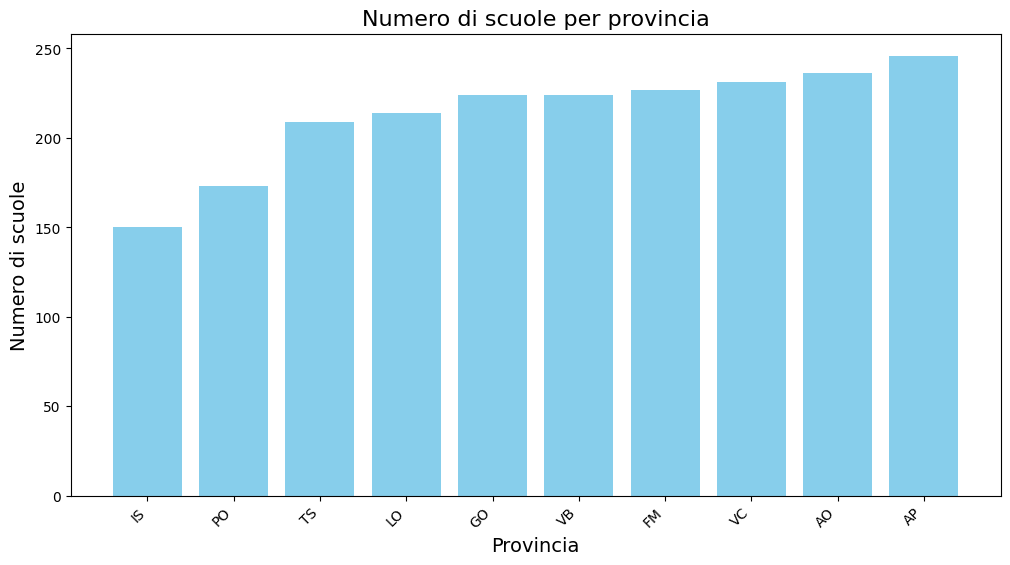

In [4]:

import matplotlib.pyplot as plt

# Ordiniamo i dati in base al numero di scuole per una visualizzazione più chiara
grouped_sorted = grouped.sort_values(ascending=True).head(10)

# Creiamo il grafico a barre
plt.figure(figsize=(12, 6))  # Definiamo una dimensione comoda per il grafico
plt.bar(grouped_sorted.index, grouped_sorted.values, color='skyblue')

# Aggiungiamo un titolo e etichette per migliorare la leggibilità
plt.title("Numero di scuole per provincia", fontsize=16)
plt.xlabel("Provincia", fontsize=14)
plt.ylabel("Numero di scuole", fontsize=14)

# Ruotiamo le etichette dell'asse x per evitare sovrapposizioni
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostriamo il grafico
plt.show()


In [5]:
# Esempio 2: Raggruppare per più colonne
# Qui raggruppiamo i dati sia per 'SIGLAPROVINCIA' sia per 'DESCRIZIONECOMUNE'.
# Questo permette di vedere il conteggio specifico per ogni combinazione di provincia e comune.
grouped_multi = df_21.groupby(['SIGLAPROVINCIA', 'DESCRIZIONECOMUNE']).size()
print("\nNumero di scuole per provincia e comune:")
print(grouped_multi)




Numero di scuole per provincia e comune:
SIGLAPROVINCIA  DESCRIZIONECOMUNE      
AG              AGRIGENTO                  75
                ALESSANDRIA DELLA ROCCA     4
                ARAGONA                    16
                BIVONA                     13
                BURGIO                      5
                                           ..
VV              VAZZANO                     3
                VIBO VALENTIA              63
                ZACCANOPOLI                 5
                ZAMBRONE                   10
                ZUNGRI                      3
Length: 6607, dtype: int64


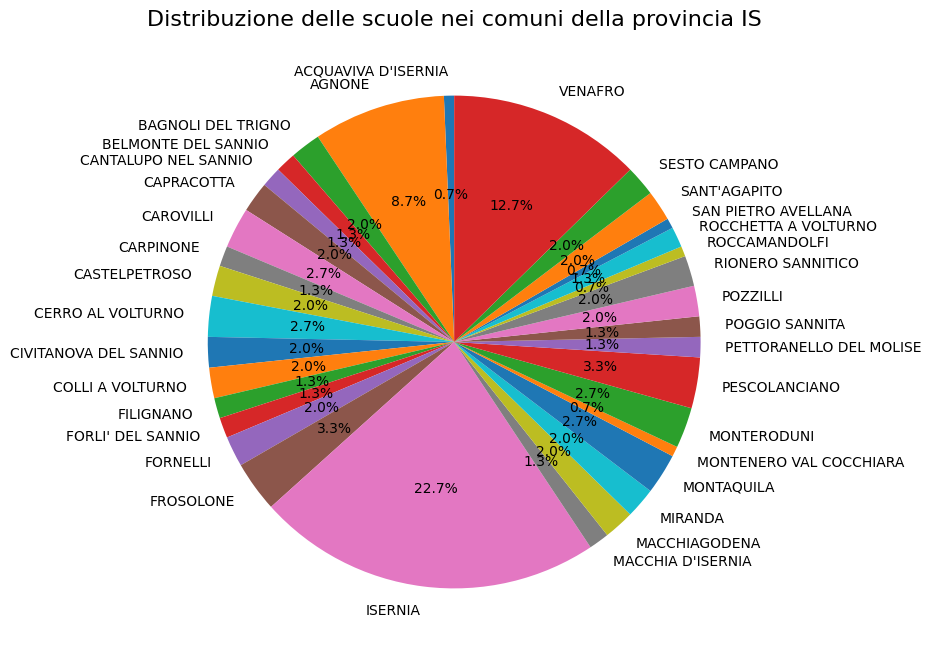

In [6]:
# Filtriamo una provincia specifica (es. 'AG')
provincia_selezionata = 'IS'
# Reset dell'indice per convertire il MultiIndex in colonne normali
grouped_multi_df = grouped_multi.reset_index(name='Numero di scuole')
provincia_data = grouped_multi_df[grouped_multi_df['SIGLAPROVINCIA'] == provincia_selezionata]

# Creazione del grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(provincia_data['Numero di scuole'], labels=provincia_data['DESCRIZIONECOMUNE'], autopct='%1.1f%%', startangle=90)
plt.title(f"Distribuzione delle scuole nei comuni della provincia {provincia_selezionata}", fontsize=16)
#plt.axis('equal')  # Assicuriamo che il grafico sia circolare
plt.show()

# Introduzione alla concatenazione di DataFrame
Quando si lavora con dati suddivisi in più file o tabelle, spesso è necessario combinarli in un unico dataset. La funzione pd.concat() di pandas ci permette di unire più DataFrame "verticalmente" (uno sotto l'altro) o "orizzontalmente" (affiancandoli).

In questo esempio, concateneremo i tre DataFrame relativi agli anni 2021, 2022 e 2023 per creare un unico DataFrame combinato.


In [7]:
# Concatenare i tre DataFrame
# Usiamo pd.concat() per unire i dati "verticalmente" (per righe).
df_all = pd.concat([df_21, df_22, df_23])

# Controllare le dimensioni di ogni DataFrame originale
# .shape restituisce il numero di righe e colonne (righe, colonne).
print("Dimensioni del dataset 2020-2021:", df_21.shape)
print("Dimensioni del dataset 2021-2022:", df_22.shape)
print("Dimensioni del dataset 2022-2023:", df_23.shape)

# Controllare le dimensioni del DataFrame concatenato
print("Dimensioni del dataset concatenato:", df_all.shape)

Dimensioni del dataset 2020-2021: (60906, 10)
Dimensioni del dataset 2021-2022: (61149, 10)
Dimensioni del dataset 2022-2023: (61307, 10)
Dimensioni del dataset concatenato: (183362, 10)


# Scoprire gli insights: province che hanno perso o guadagnato più scuole
Uno degli obiettivi del data storytelling è individuare cambiamenti significativi nei dati e usarli per raccontare una storia. In questo esercizio, analizzeremo le variazioni nel numero di scuole per provincia tra gli anni scolastici 2020-2021 e 2022-2023. Questo ci permetterà di identificare:

1. La provincia che ha guadagnato più scuole.
2. La provincia che ha perso più scuole.

Spiegazione del processo

*  Raggruppamento e conteggio: Usiamo groupby per contare il numero di scuole (CODICEEDIFICIO) in ogni provincia per ogni anno scolastico.
*  Riorganizzazione dei dati: Convertiamo il risultato in una tabella con gli anni scolastici come colonne (.unstack()), riempiendo i valori mancanti con 0.
*  Calcolo del Delta: Aggiungiamo una colonna che rappresenta la variazione nel numero di scuole tra gli anni scolastici.
*  Individuare gli estremi: Troviamo le province con il massimo incremento e decremento usando idxmax() e idxmin().

In [8]:
# Raggruppare i dati per provincia ('SIGLAPROVINCIA') e anno scolastico ('ANNOSCOLASTICO')
# Calcoliamo il numero di edifici scolastici ('CODICEEDIFICIO') per ogni combinazione di provincia e anno.
change_province = df_all.groupby(['SIGLAPROVINCIA', 'ANNOSCOLASTICO'])['CODICEEDIFICIO'].size().unstack(fill_value=0)
change_province

ANNOSCOLASTICO,202021,202122,202223
SIGLAPROVINCIA,,,
AG,576,556,573
AL,479,488,487
AN,559,581,577
AO,236,225,233
AP,246,244,236
...,...,...,...
VE,693,703,697
VI,802,816,813
VR,710,713,713


In [9]:

# Calcolare la variazione (Delta) tra gli anni scolastici 2022-2023 e 2020-2021
# Creiamo una nuova colonna 'Delta' per rappresentare il cambiamento.
change_province['Delta'] = change_province[202223] - change_province[202021]
print("Variazione del numero di scuole per provincia:")
display(change_province)


Variazione del numero di scuole per provincia:


ANNOSCOLASTICO,202021,202122,202223,Delta
SIGLAPROVINCIA,,,,
AG,576,556,573,-3
AL,479,488,487,8
AN,559,581,577,18
AO,236,225,233,-3
AP,246,244,236,-10
...,...,...,...,...
VE,693,703,697,4
VI,802,816,813,11
VR,710,713,713,3


In [10]:
# Trovare la provincia con il maggiore incremento e il maggiore decremento
province_most_positive = change_province['Delta'].idxmax()  # Provincia con maggior guadagno
province_most_negative = change_province['Delta'].idxmin()  # Provincia con maggior perdita

# Estrarre i valori Delta corrispondenti
delta_positive = change_province.loc[province_most_positive, 'Delta']
delta_negative = change_province.loc[province_most_negative, 'Delta']

# Stampare i risultati
print(f"Provincia con il maggior incremento: {province_most_positive}, Delta: {delta_positive}")
print(f"Provincia con il maggior decremento: {province_most_negative}, Delta: {delta_negative}")


Provincia con il maggior incremento: BA, Delta: 35
Provincia con il maggior decremento: PA, Delta: -57


ANNOSCOLASTICO
202021    1059
202122    1083
202223    1094
Name: BA, dtype: int64


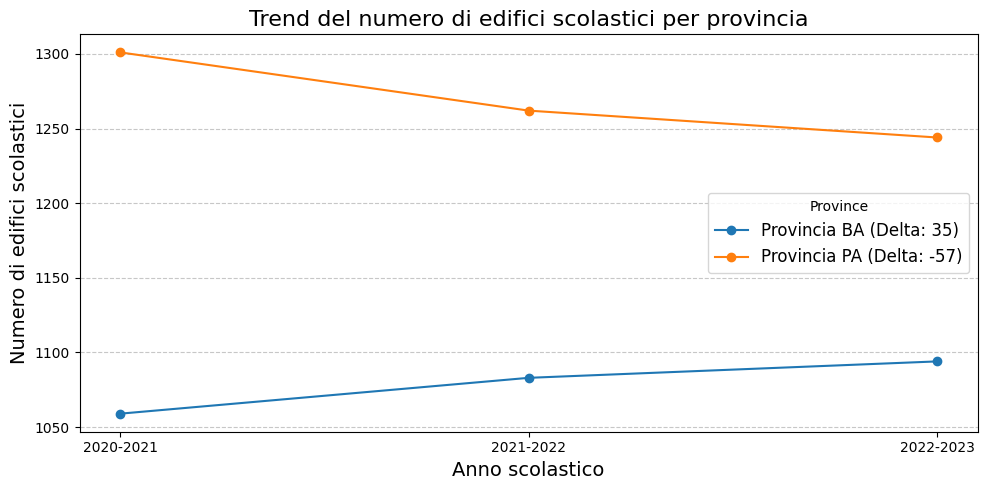

In [11]:
# Definiamo le colonne corrispondenti agli anni scolastici
years = [202021, 202122, 202223]  # Questi sono numerici, non stringhe

# Dati per le province selezionate
trend_positive = change_province.loc[province_most_positive, years]
trend_negative = change_province.loc[province_most_negative, years]
print(trend_positive)

# Plot del trend per la provincia con il maggiore incremento e decremento
plt.figure(figsize=(10, 5))
plt.plot(years, trend_positive, marker='o', label=f"Provincia {province_most_positive} (Delta: {change_province.loc[province_most_positive, 'Delta']})")
plt.plot(years, trend_negative, marker='o', label=f"Provincia {province_most_negative} (Delta: {change_province.loc[province_most_negative, 'Delta']})")

# Aggiunta di etichette, titolo e legenda
plt.title("Trend del numero di edifici scolastici per provincia", fontsize=16)
plt.xlabel("Anno scolastico", fontsize=14)
plt.ylabel("Numero di edifici scolastici", fontsize=14)
plt.legend(title="Province", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=years, labels=['2020-2021', '2021-2022', '2022-2023'])  # Etichette leggibili per gli anni
plt.tight_layout()

# Mostra il grafico
plt.show()


In [11]:
# Merge

Uniamo ora un dataset diverso, quello relativo ai rischi ambientali

In [12]:
df_23 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDIANAGRAFESTA202120222320230731_22_23.csv')
df_23_ambiente = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDIAMBIENTESTA202120222320230731_ambiente_22_23.csv')
display(df_23.head())
display(df_23_ambiente.head())

,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CODICECOMUNE,DESCRIZIONECOMUNE,SIGLAPROVINCIA,TIPOLOGIAINDIRIZZO,DENOMINAZIONEINDIRIZZO,NUMEROCIVICO,CAP
0,202223,SSEE843011,900690238,90069,SORSO,SS,Via,Azuni,1,07037
1,202223,FGAA10602V,710510148,71051,SAN SEVERO,FG,Piazza,LUIGI SCHINGO,snc,71016
2,202223,FRPC031018,600191427,60019,CASSINO,FR,Via,Lombardia,1,03043
3,202223,BAAA55902E,720111577,72011,BITONTO,BA,Via,Raffaele ABBATICCHIO,1,70032
4,202223,BNMM83302B,620170003,62017,CASTELPAGANO,BN,Via,GIUSEPPE GARIBALDI,86,82024


,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CONTESTOSENZADISTURBI,VICINANZADISCARICA,VICINANZAINDUSTRIEINQUINANTI,VICINANZAACQUEINQUINANTI,VICINANZAFONTIINQUINAMENTOATMOSFERICO,VICINANZAFONTIINQUINAMENTOACUSTICO,VICINANZASORGENTIRADIAZIONIELETTROMAGNETICHE,...,VICINANZAALTRIDISTURBI,CRITICITASPECIFICHEAREASCOLASTICA,ASSENZAPIAZZOLAADEGUATA,AREANONRECINTATA,PRESENZAGRANDETRAFFICO,PRESENZATRANSITOFERROVIARIO,PREESISTENZEINDUSTRIALIABBANDONATE,ZONAURBANADEGRADATA,VICINANZAINDUSTRIEARISCHIO,ALTRECRITICITASPECIFICHE
0,202223,AO1E008020,70634600,NO,NO,NO,NO,NO,NO,NO,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
1,202223,SARH02101R,651290505,SI,NO,NO,NO,NO,NO,NO,...,_,SI,NO,NO,NO,NO,NO,NO,NO,_
2,202223,BRTD01101P,740101664,NO,NO,NO,NO,NO,NO,NO,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
3,202223,CRAA81201T,190780082,NO,NO,NO,NO,NO,NO,NO,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
4,202223,NARH04101G,630830017,NO,NO,NO,NO,NO,NO,NO,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_


In [13]:
print(df_23_ambiente.columns)

Index(['ANNOSCOLASTICO', 'CODICESCUOLA', 'CODICEEDIFICIO',
       'CONTESTOSENZADISTURBI', 'VICINANZADISCARICA',
       'VICINANZAINDUSTRIEINQUINANTI', 'VICINANZAACQUEINQUINANTI',
       'VICINANZAFONTIINQUINAMENTOATMOSFERICO',
       'VICINANZAFONTIINQUINAMENTOACUSTICO',
       'VICINANZASORGENTIRADIAZIONIELETTROMAGNETICHE', 'VICINANZACIMITERI',
       'VICINANZAALTRIDISTURBI', 'CRITICITASPECIFICHEAREASCOLASTICA',
       'ASSENZAPIAZZOLAADEGUATA', 'AREANONRECINTATA', 'PRESENZAGRANDETRAFFICO',
       'PRESENZATRANSITOFERROVIARIO', 'PREESISTENZEINDUSTRIALIABBANDONATE',
       'ZONAURBANADEGRADATA', 'VICINANZAINDUSTRIEARISCHIO',
       'ALTRECRITICITASPECIFICHE'],
      dtype='object')


In [14]:
# Seleziona le colonne dei disturbi
disturbi_columns = [
    'VICINANZADISCARICA',
       'VICINANZAINDUSTRIEINQUINANTI', 'VICINANZAACQUEINQUINANTI',
       'VICINANZAFONTIINQUINAMENTOATMOSFERICO',
       'VICINANZAFONTIINQUINAMENTOACUSTICO',
       'VICINANZASORGENTIRADIAZIONIELETTROMAGNETICHE', 'VICINANZACIMITERI',
       'VICINANZAALTRIDISTURBI',
       'ASSENZAPIAZZOLAADEGUATA', 'AREANONRECINTATA', 'PRESENZAGRANDETRAFFICO',
       'PRESENZATRANSITOFERROVIARIO', 'PREESISTENZEINDUSTRIALIABBANDONATE',
       'ZONAURBANADEGRADATA', 'VICINANZAINDUSTRIEARISCHIO',
       'ALTRECRITICITASPECIFICHE'
]

# Conta le occorrenze di "SI" per ogni colonna
disturbi_count = df_23_ambiente[disturbi_columns].apply(lambda col: (col == 'SI').sum())

# Trova la colonna con il massimo numero di "SI"
disturbo_piu_frequente = disturbi_count.idxmax()
numero_occorrenze = disturbi_count.max()

print(f"La colonna dei disturbi più frequente è '{disturbo_piu_frequente}' con {numero_occorrenze} occorrenze.")

# Mostra tutte le frequenze (opzionale)
print(disturbi_count)

La colonna dei disturbi più frequente è 'VICINANZAFONTIINQUINAMENTOACUSTICO' con 3848 occorrenze.
VICINANZADISCARICA                               232
VICINANZAINDUSTRIEINQUINANTI                     455
VICINANZAACQUEINQUINANTI                         444
VICINANZAFONTIINQUINAMENTOATMOSFERICO           1606
VICINANZAFONTIINQUINAMENTOACUSTICO              3848
VICINANZASORGENTIRADIAZIONIELETTROMAGNETICHE    1330
VICINANZACIMITERI                                296
VICINANZAALTRIDISTURBI                             0
ASSENZAPIAZZOLAADEGUATA                         3551
AREANONRECINTATA                                2226
PRESENZAGRANDETRAFFICO                          2695
PRESENZATRANSITOFERROVIARIO                      482
PREESISTENZEINDUSTRIALIABBANDONATE               144
ZONAURBANADEGRADATA                              576
VICINANZAINDUSTRIEARISCHIO                       168
ALTRECRITICITASPECIFICHE                           0
dtype: int64


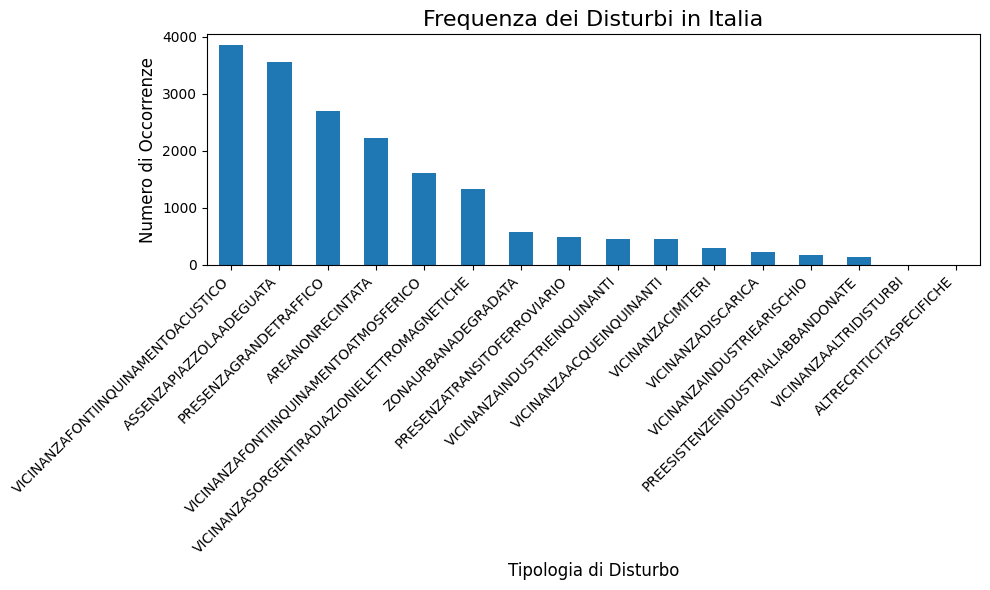

In [15]:
# Ordina disturbi_count in ordine decrescente
disturbi_count_sorted = disturbi_count.sort_values(ascending=False)

# Crea un bar chart
plt.figure(figsize=(10, 6))
disturbi_count_sorted.plot(kind='bar')
plt.title('Frequenza dei Disturbi in Italia', fontsize=16)
plt.xlabel('Tipologia di Disturbo', fontsize=12)
plt.ylabel('Numero di Occorrenze', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
merged_df = pd.merge(
    df_23,
    df_23_ambiente,
    on=['CODICESCUOLA', 'CODICEEDIFICIO','ANNOSCOLASTICO'],
    how='inner'  # Puoi scegliere 'inner', 'left', 'right' o 'outer' in base alle esigenze
)
merged_df

,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CODICECOMUNE,DESCRIZIONECOMUNE,SIGLAPROVINCIA,TIPOLOGIAINDIRIZZO,DENOMINAZIONEINDIRIZZO,NUMEROCIVICO,CAP,...,VICINANZAALTRIDISTURBI,CRITICITASPECIFICHEAREASCOLASTICA,ASSENZAPIAZZOLAADEGUATA,AREANONRECINTATA,PRESENZAGRANDETRAFFICO,PRESENZATRANSITOFERROVIARIO,PREESISTENZEINDUSTRIALIABBANDONATE,ZONAURBANADEGRADATA,VICINANZAINDUSTRIEARISCHIO,ALTRECRITICITASPECIFICHE
0,202223,SSEE843011,900690238,90069,SORSO,SS,Via,Azuni,1,07037,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
1,202223,FGAA10602V,710510148,71051,SAN SEVERO,FG,Piazza,LUIGI SCHINGO,snc,71016,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
2,202223,FRPC031018,600191427,60019,CASSINO,FR,Via,Lombardia,1,03043,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
3,202223,BAAA55902E,720111577,72011,BITONTO,BA,Via,Raffaele ABBATICCHIO,1,70032,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
4,202223,BNMM83302B,620170003,62017,CASTELPAGANO,BN,Via,GIUSEPPE GARIBALDI,86,82024,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61306,202223,TEMM83201B,670410169,67041,TERAMO,TE,Via,AEROPORTO,2,64100,...,_,SI,NO,NO,NO,NO,NO,NO,NO,AREA ESTERNA RECINTATA PARZIALMENTE
61307,202223,FEAA82101B,380060015,38006,COMACCHIO,FE,Via,CARDUCCI,8,44022,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
61308,202223,ATEE81501B,50650001,5065,MOMBARUZZO,AT,Via,XX SETTEMBRE,29,14046,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_
61309,202223,VBMM819023,1030190003,103019,CASALE CORTE CERRO,VB,Via,Montebuglio,12,28881,...,_,NO,NO,NO,NO,NO,NO,NO,NO,_


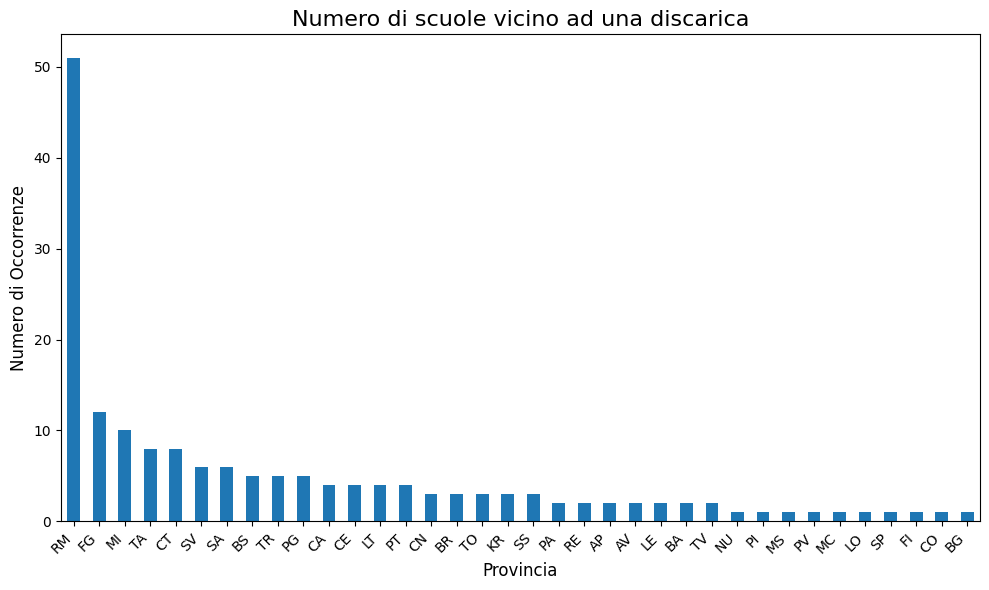

In [17]:
# Conta le scuole vicino a una discarica per provincia
scuole_vicino_discarica = merged_df[merged_df['VICINANZADISCARICA'] == 'SI'].groupby('SIGLAPROVINCIA').size()

# Ordina in ordine decrescente per visualizzare i risultati più facilmente
scuole_vicino_discarica_sorted = scuole_vicino_discarica.sort_values(ascending=False)

# Crea un bar chart
plt.figure(figsize=(10, 6))
scuole_vicino_discarica_sorted.plot(kind='bar')
plt.title('Numero di scuole vicino ad una discarica', fontsize=16)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Numero di Occorrenze', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
df_23 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDIANAGRAFESTA202120222320230731_22_23.csv')
df_23_superfici = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/EDICONSISTENZASTA202120222320230731_superfici_volumi_22_23.csv')
display(df_23.head())
display(df_23_superfici.head())

,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CODICECOMUNE,DESCRIZIONECOMUNE,SIGLAPROVINCIA,TIPOLOGIAINDIRIZZO,DENOMINAZIONEINDIRIZZO,NUMEROCIVICO,CAP
0,202223,SSEE843011,900690238,90069,SORSO,SS,Via,Azuni,1,07037
1,202223,FGAA10602V,710510148,71051,SAN SEVERO,FG,Piazza,LUIGI SCHINGO,snc,71016
2,202223,FRPC031018,600191427,60019,CASSINO,FR,Via,Lombardia,1,03043
3,202223,BAAA55902E,720111577,72011,BITONTO,BA,Via,Raffaele ABBATICCHIO,1,70032
4,202223,BNMM83302B,620170003,62017,CASTELPAGANO,BN,Via,GIUSEPPE GARIBALDI,86,82024


,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,SUPERFICIETOTALEAREASCOLASTICA,SUPERFICIETOTALEAREALIBERA,VOLUMELORDOEDIFICIO,NUMEROCOMPLESSIVOPIANI
0,202223,LEPS04000E,750292322,"10.903,00","8.383,00","5.930,00",2
1,202223,CEAA870049,610751560,"2.150,00","1.550,00","4.200,00",2
2,202223,MOMM825012,360060147,"5.050,00","3.456,00","13.376,55",5
3,202223,FITN02301T,480040006,"14.666,00","10.718,00","1.857,00",1
4,202223,MNMM839039,200250270,"8.063,00","6.593,00","5.368,00",3


In [19]:
merged_df = pd.merge(
    df_23,
    df_23_superfici,
    on=['CODICESCUOLA', 'CODICEEDIFICIO','ANNOSCOLASTICO'],
    how='inner'  # Puoi scegliere 'inner', 'left', 'right' o 'outer' in base alle esigenze
)
merged_df

,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CODICECOMUNE,DESCRIZIONECOMUNE,SIGLAPROVINCIA,TIPOLOGIAINDIRIZZO,DENOMINAZIONEINDIRIZZO,NUMEROCIVICO,CAP,SUPERFICIETOTALEAREASCOLASTICA,SUPERFICIETOTALEAREALIBERA,VOLUMELORDOEDIFICIO,NUMEROCOMPLESSIVOPIANI
0,202223,SSEE843011,900690238,90069,SORSO,SS,Via,Azuni,1,07037,"6.260,00","3.359,00","6.037,21",1
1,202223,FGAA10602V,710510148,71051,SAN SEVERO,FG,Piazza,LUIGI SCHINGO,snc,71016,"4.242,00","3.035,00","4.800,00",2
2,202223,FRPC031018,600191427,60019,CASSINO,FR,Via,Lombardia,1,03043,"6.250,00","4.158,00","4.400,00",2
3,202223,BAAA55902E,720111577,72011,BITONTO,BA,Via,Raffaele ABBATICCHIO,1,70032,"5.963,00","4.654,00","7.232,00",3
4,202223,BNMM83302B,620170003,62017,CASTELPAGANO,BN,Via,GIUSEPPE GARIBALDI,86,82024,"1.026,00","1.447,00","6.156,00",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61306,202223,TEMM83201B,670410169,67041,TERAMO,TE,Via,AEROPORTO,2,64100,"8.025,00","6.669,00","10.541,00",4
61307,202223,FEAA82101B,380060015,38006,COMACCHIO,FE,Via,CARDUCCI,8,44022,"1.877,00","1.254,00","4.247,00",2
61308,202223,ATEE81501B,50650001,5065,MOMBARUZZO,AT,Via,XX SETTEMBRE,29,14046,"800,00","470,00","2.600,00",4
61309,202223,VBMM819023,1030190003,103019,CASALE CORTE CERRO,VB,Via,Montebuglio,12,28881,"3.800,00","3.120,00","6.769,00",3


In [20]:
# Calcola la media e la deviazione standard
#media_superficie = merged_df['SUPERFICIETOTALEAREASCOLASTICA'].mean()
#deviazione_standard_superficie = merged_df['SUPERFICIETOTALEAREASCOLASTICA'].std()

#media_superficie, deviazione_standard_superficie

In [21]:
merged_df['SUPERFICIETOTALEAREASCOLASTICA'] = (
    merged_df['SUPERFICIETOTALEAREASCOLASTICA']
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

# Calcola la media e la deviazione standard
media_superficie = merged_df['SUPERFICIETOTALEAREASCOLASTICA'].mean()

print('superficie totale media italiana è ', media_superficie, 'mq')

superficie totale media italiana è  7460.4762230268625 mq


In [22]:
superficie_media_per_provincia = (
    merged_df.groupby('SIGLAPROVINCIA')['SUPERFICIETOTALEAREASCOLASTICA']
    .mean()
    .sort_values(ascending=False)
)

superficie_media_per_provincia

,SUPERFICIETOTALEAREASCOLASTICA
SIGLAPROVINCIA,
MO,50365.321763
MB,15444.945864
TV,14632.010074
NO,14289.187179
CA,14061.796977
...,...
RC,3150.752093
VV,2998.833252
ME,2987.615316


In [23]:
media_piani = merged_df['NUMEROCOMPLESSIVOPIANI'].mean()

print('numero medio di piani in edifici scolastici è ', media_piani)

piani_media_per_provincia = (
    merged_df.groupby('SIGLAPROVINCIA')['NUMEROCOMPLESSIVOPIANI']
    .mean()
    .sort_values(ascending=False)
)

piani_media_per_provincia

numero medio di piani in edifici scolastici è  2.45448614441128


,NUMEROCOMPLESSIVOPIANI
SIGLAPROVINCIA,
GE,4.431953
AO,3.746835
TS,3.550239
IM,3.247934
SO,3.100000
...,...
SU,2.008897
FE,1.993548
CE,1.978723


# Servizio scolastico e popolazione

Il numero di scuole in una provincia non racconta l'intera storia. Per comprendere davvero l'efficacia del servizio scolastico, dobbiamo considerare un altro fattore fondamentale: la popolazione.

Un'analisi che confronta le scuole disponibili con il numero di abitanti può svelare importanti squilibri o miglioramenti nel servizio offerto. Ad esempio, una provincia che perde scuole potrebbe non necessariamente peggiorare il proprio servizio se anche la popolazione si riduce in modo significativo. Allo stesso modo, un incremento nel numero di scuole potrebbe non essere sufficiente se la popolazione cresce più rapidamente.

In questa fase, integreremo i dati sulla popolazione forniti dall'ISTAT per normalizzare le nostre osservazioni

Caricare il dataset ISTAT e verificare le entità territoriali disponibili


In [24]:
# Caricare il dataset ISTAT
df_istat_popolazione = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/OSINTItalia/istat_DCSS_POP_DEMCITMIG_21112024161513072.csv')

# Esaminare i valori unici nella colonna 'Territorio'
territori_unici = df_istat_popolazione['Territorio'].unique()
print("Valori unici nella colonna 'Territorio':")
print(territori_unici)


Valori unici nella colonna 'Territorio':
['Verbano-Cusio-Ossola' "Valle d'Aosta / Vallée d'Aoste" 'Genova' 'Varese'
 'Trento' 'Verona' 'Belluno' 'Padova' 'Gorizia' "Reggio nell'Emilia"
 'Ravenna' 'Forlì-Cesena' 'Lucca' 'Pistoia' 'Livorno' 'Terni' 'Campobasso'
 'Campania' 'Caserta' 'Bari' 'Lecce' 'Sicilia' 'Enna' 'Fermo' 'Torino'
 'Asti' 'Alessandria' 'Imperia' 'Provincia Autonoma Bolzano / Bozen'
 'Trieste' 'Piacenza' 'Modena' 'Ferrara' 'Rimini' 'Toscana' 'Arezzo'
 'Macerata' 'Rieti' 'Roma' 'Frosinone' 'Taranto' 'Vibo Valentia'
 'Cagliari' 'Nord-ovest' 'Nord-est' 'Lazio' 'Sud' 'Napoli' 'Messina'
 'Liguria' 'Sondrio' 'Brescia' 'Parma' 'Grosseto' 'Teramo' 'Benevento'
 'Avellino' 'Puglia' 'Basilicata' 'Matera' 'Palermo' 'Ragusa' 'Siracusa'
 'La Spezia' 'Bergamo' 'Mantova' 'Centro' 'Firenze' 'Pesaro e Urbino'
 'Isernia' 'Salerno' 'Brindisi' 'Caltanissetta' 'Sassari' 'Sud Sardegna'
 'Italia' 'Milano' 'Bolzano / Bozen' 'Treviso' 'Ancona' 'Catanzaro'
 'Crotone' 'Agrigento' 'Pordenone' 'Piemon

In [25]:
df_istat_popolazione.head()

,ITTER107,Territorio,TIPO_DATO_CENS_POP,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,CITTADINANZA,Cittadinanza,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC14,Verbano-Cusio-Ossola,RESPOP_AV,popolazione residente,F,femmine,Y_GE100,100 anni e più,ITL,italiano-a,2022,2022,56,NaN,NaN
1,ITC20,Valle d'Aosta / Vallée d'Aoste,RESPOP_AV,popolazione residente,F,femmine,Y_GE100,100 anni e più,ITL,italiano-a,2022,2022,33,NaN,NaN
2,ITC33,Genova,RESPOP_AV,popolazione residente,M,maschi,Y_GE100,100 anni e più,ITL,italiano-a,2022,2022,64,NaN,NaN
3,ITC41,Varese,RESPOP_AV,popolazione residente,M,maschi,Y_GE100,100 anni e più,ITL,italiano-a,2022,2022,61,NaN,NaN
4,ITC41,Varese,RESPOP_AV,popolazione residente,T,totale,Y_GE100,100 anni e più,ITL,italiano-a,2022,2022,309,NaN,NaN


# Introduzione ai filtri in pandas

1. Condizioni: Ogni condizione (es. df['colonna'] == valore) genera un array di valori booleani (True o False) per ciascuna riga del dataset. Solo le righe con True verranno mantenute.

* Esempio: df['Sesso'] == 'totale' seleziona le righe in cui la colonna Sesso contiene la stringa 'totale'.

2. Combina più condizioni:
* AND (&): Richiede che tutte le condizioni siano soddisfatte.
* OR (|): Richiede che almeno una delle condizioni sia soddisfatta.
* NOT (~): Inverte la condizione (es. da True a False e viceversa).

3. Uso delle parentesi:
Quando combini più condizioni, ciascuna deve essere racchiusa tra parentesi per evitare errori nell'interpretazione degli operatori.

Nel nostro caso:
- Le colonne Classe di età, Cittadinanza, e Sesso contengono valori dettagliati (es. fasce d'età, cittadini italiani o stranieri, maschi e femmine). Filtrando per 'totale', manteniamo solo i dati aggregati.
- Le colonne SEXISTAT1 e ETA1 utilizzano codici ISTAT che rappresentano il totale per sesso e età.

In [26]:
# Applicare filtri per selezionare solo i totali
df_istat_popolazione = df_istat_popolazione[
    (df_istat_popolazione['Classe di età'] == 'totale') &       # Solo la classe di età totale
    (df_istat_popolazione['Cittadinanza'] == 'totale')  &       # Solo i dati di cittadinanza totale
    (df_istat_popolazione['Sesso'] == 'totale')         &       # Solo il totale per sesso
    (df_istat_popolazione['SEXISTAT1'] == 'T')          &       # Codifica ISTAT per totale sesso
    (df_istat_popolazione['ETA1'] == 'TOTAL')                   # Codifica ISTAT per totale età
]

# Stampare il dataset filtrato
print("Dataset ISTAT filtrato sui totali:")
display(df_istat_popolazione)


Dataset ISTAT filtrato sui totali:


,ITTER107,Territorio,TIPO_DATO_CENS_POP,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,CITTADINANZA,Cittadinanza,TIME,Seleziona periodo,Value,Flag Codes,Flags
107,IT,Italia,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,58997201,NaN,NaN
109,ITD,Nord-est,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,11558522,NaN,NaN
110,ITD10,Bolzano / Bozen,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,534147,NaN,NaN
116,ITE32,Ancona,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,461655,NaN,NaN
118,ITE45,Frosinone,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,467866,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2148,ITC43,Lecco,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,332775,NaN,NaN
2151,ITD32,Vicenza,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,852779,NaN,NaN
2152,ITD4,Friuli-Venezia Giulia,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,1194248,NaN,NaN
2156,ITF62,Crotone,RESPOP_AV,popolazione residente,T,totale,TOTAL,totale,TOTAL,totale,2022,2022,162749,NaN,NaN


# Introduzione al concetto di ETL: creiamo la colonna "Regione"
Quando si lavora con dati, un processo comune e fondamentale è il flusso ETL:

1. Extract (Estrazione): Raccolta dei dati da varie fonti, come file CSV, database o API.
2. Transform (Trasformazione): Pulizia, riorganizzazione e preparazione dei dati per l'analisi.
3. Load (Caricamento): Inserimento dei dati trasformati in un sistema o una struttura pronta per l'analisi.

In particolare qui vedremo come:

* Automatizzare la generazione di un dizionario province_to_region con ChatGPT evita errori e accelera il processo.

* Map: Il metodo .map() applica una funzione (in questo caso il dizionario) a ogni valore di una colonna.

* Controllo dei NaN: Dopo la trasformazione, è importante verificare eventuali valori non mappati.

In [27]:
# Verificare i territori ISTAT nel dataset della popolazione
print("\nTerritori nel dataset ISTAT:")
print(df_istat_popolazione['Territorio'].unique())


Territori nel dataset ISTAT:
['Italia' 'Nord-est' 'Bolzano / Bozen' 'Ancona' 'Frosinone' 'Puglia'
 'Grosseto' 'Sassari' 'Cuneo' 'Provincia Autonoma Trento' 'Campania' 'Sud'
 'Piacenza' 'Modena' "Reggio nell'Emilia" 'Padova' 'Parma' 'Lecce'
 'Vercelli' 'Messina' 'Siracusa' 'Livorno' 'Cagliari'
 "Valle d'Aosta / Vallée d'Aoste" 'Forlì-Cesena' 'Nord-ovest' 'Prato'
 'Arezzo' 'Campobasso' 'Bergamo' 'Lazio' 'Vibo Valentia' 'Catanzaro'
 'Cremona' 'Biella' 'Verona' 'Pistoia' 'Perugia' 'Lodi' 'Savona' 'Rieti'
 'Liguria' 'Umbria' 'Pavia' 'Trento' 'Caserta' 'Sondrio'
 'Reggio di Calabria' 'Milano' 'Basilicata' 'Rimini' 'Firenze' 'Palermo'
 'Salerno' 'Treviso' 'Catania' "L'Aquila" 'Monza e della Brianza' 'Genova'
 'Pordenone' 'Macerata' 'Toscana' 'Teramo' 'Fermo' 'Imperia'
 'Emilia-Romagna' 'Caltanissetta' 'Chieti' 'Asti' 'Pisa' 'Potenza'
 'Centro' 'Terni' 'Veneto' 'Molise' 'Rovigo' 'Foggia' 'Lucca' 'Varese'
 'Como' 'Mantova' 'Provincia Autonoma Bolzano / Bozen' 'Ferrara' 'Ravenna'
 'Roma' 'Cosen

In [28]:
# Verificare le sigle delle province nel dataset scolastico
print("Sigle delle province nel dataset delle scuole:")
print(df_all['SIGLAPROVINCIA'].unique())


Sigle delle province nel dataset delle scuole:
['SA' 'TO' 'BS' 'PG' 'SS' 'UD' 'VT' 'CT' 'SI' 'RC' 'CO' 'TV' 'VB' 'LT'
 'AV' 'CN' 'VR' 'TP' 'PZ' 'PA' 'VA' 'PE' 'VE' 'IM' 'ME' 'VI' 'RM' 'CE' nan
 'SU' 'MI' 'FG' 'SV' 'BG' 'MN' 'MC' 'RG' 'CS' 'AP' 'AR' 'LO' 'TE' 'TA'
 'PC' 'GE' 'CR' 'BL' 'LI' 'RN' 'AO' 'CZ' 'SO' 'MB' 'PN' 'PR' 'BA' 'MO'
 'VV' 'AQ' 'PV' 'AT' 'TR' 'BR' 'PO' 'BI' 'SP' 'BO' 'FC' 'PU' 'RE' 'FI'
 'AN' 'FM' 'FR' 'GO' 'LU' 'CH' 'PT' 'AL' 'CA' 'BT' 'CL' 'NU' 'AG' 'OR'
 'GR' 'LE' 'RI' 'LC' 'NO' 'MT' 'BN' 'PD' 'EN' 'IS' 'CB' 'TS' 'MS' 'KR'
 'PI' 'FE' 'RO' 'RA' 'SR' 'VC']


# Prompt per chatgpt

Mi mappi df_all['SIGLAPROVINCIA'].unique() array(['SA', 'TO', 'BS', 'PG', 'SS', 'UD', 'VT', 'CT', 'SI', 'RC', 'CO',
       'TV', 'VB', 'LT', 'AV', 'CN', 'VR', 'TP', 'PZ', 'PA', 'VA', 'PE',
       'VE', 'IM', 'ME', 'VI', 'RM', 'CE', nan, 'SU', 'MI', 'FG', 'SV',
       'BG', 'MN', 'MC', 'RG', 'CS', 'AP', 'AR', 'LO', 'TE', 'TA', 'PC',
       'GE', 'CR', 'BL', 'LI', 'RN', 'AO', 'CZ', 'SO', 'MB', 'PN', 'PR',
       'BA', 'MO', 'VV', 'AQ', 'PV', 'AT', 'TR', 'BR', 'PO', 'BI', 'SP',
       'BO', 'FC', 'PU', 'RE', 'FI', 'AN', 'FM', 'FR', 'GO', 'LU', 'CH',
       'PT', 'AL', 'CA', 'BT', 'CL', 'NU', 'AG', 'OR', 'GR', 'LE', 'RI',
       'LC', 'NO', 'MT', 'BN', 'PD', 'EN', 'IS', 'CB', 'TS', 'MS', 'KR',
       'PI', 'FE', 'RO', 'RA', 'SR', 'VC'], dtype=object) nelle rispettive regioni presenti nella lista
0 s
df_istat_popolazione['Territorio'].unique()
array(['Italia', 'Nord-est', 'Bolzano / Bozen', 'Ancona', 'Frosinone',
       'Puglia', 'Grosseto', 'Sassari', 'Cuneo',
       'Provincia Autonoma Trento', 'Campania', 'Sud', 'Piacenza',
       'Modena', "Reggio nell'Emilia", 'Padova', 'Parma', 'Lecce',
       'Vercelli', 'Messina', 'Siracusa', 'Livorno', 'Cagliari',
       "Valle d'Aosta / Vallée d'Aoste", 'Forlì-Cesena', 'Nord-ovest',
       'Prato', 'Arezzo', 'Campobasso', 'Bergamo', 'Lazio',
       'Vibo Valentia', 'Catanzaro', 'Cremona', 'Biella', 'Verona',
       'Pistoia', 'Perugia', 'Lodi', 'Savona', 'Rieti', 'Liguria',
       'Umbria', 'Pavia', 'Trento', 'Caserta', 'Sondrio',
       'Reggio di Calabria', 'Milano', 'Basilicata', 'Rimini', 'Firenze',
       'Palermo', 'Salerno', 'Treviso', 'Catania', "L'Aquila",
       'Monza e della Brianza', 'Genova', 'Pordenone', 'Macerata',
       'Toscana', 'Teramo', 'Fermo', 'Imperia', 'Emilia-Romagna',
       'Caltanissetta', 'Chieti', 'Asti', 'Pisa', 'Potenza', 'Centro',
       'Terni', 'Veneto', 'Molise', 'Rovigo', 'Foggia', 'Lucca', 'Varese',
       'Como', 'Mantova', 'Provincia Autonoma Bolzano / Bozen', 'Ferrara',
       'Ravenna', 'Roma', 'Cosenza', 'Pescara', 'Isernia', 'Benevento',
       'Enna', 'Lombardia', 'Alessandria', 'La Spezia', 'Abruzzo',
       'Calabria', 'Sicilia', 'Torino', 'Belluno', 'Ascoli Piceno',
       'Matera', 'Agrigento', 'Sardegna', 'Oristano',
       'Barletta-Andria-Trani', 'Piemonte', 'Brescia', 'Trapani',
       'Pesaro e Urbino', 'Venezia', 'Sud Sardegna', 'Novara',
       'Verbano-Cusio-Ossola', 'Massa-Carrara', 'Isole', 'Trieste',
       'Marche', 'Viterbo', 'Bari', 'Udine', 'Avellino', 'Bologna',
       'Latina', 'Napoli', 'Nuoro', 'Gorizia', 'Brindisi', 'Ragusa',
       'Siena', 'Taranto', 'Lecco', 'Vicenza', 'Friuli-Venezia Giulia',
       'Crotone', 'Trentino Alto Adige / Südtirol'], dtype=object)

In [29]:
# Dizionario per mappare le province alle regioni

province_to_region = {
    'AG': 'Sicilia', 'AL': 'Piemonte', 'AN': 'Marche', 'AO': "Valle d'Aosta / Vallée d'Aoste",
    'AR': 'Toscana', 'AP': 'Marche', 'AT': 'Piemonte', 'AV': 'Campania', 'BA': 'Puglia',
    'BT': 'Puglia', 'BL': 'Veneto', 'BN': 'Campania', 'BG': 'Lombardia', 'BI': 'Piemonte',
    'BO': 'Emilia-Romagna', 'BZ': 'Provincia Autonoma Bolzano / Bozen', 'BS': 'Lombardia',
    'BR': 'Puglia', 'CA': 'Sardegna', 'CL': 'Sicilia', 'CB': 'Molise', 'CI': 'Sardegna',
    'CE': 'Campania', 'CT': 'Sicilia', 'CZ': 'Calabria', 'CH': 'Abruzzo', 'CO': 'Lombardia',
    'CS': 'Calabria', 'CR': 'Lombardia', 'KR': 'Calabria', 'CN': 'Piemonte', 'EN': 'Sicilia',
    'FM': 'Marche', 'FE': 'Emilia-Romagna', 'FI': 'Toscana', 'FG': 'Puglia', 'FC': 'Emilia-Romagna',
    'FR': 'Lazio', 'GE': 'Liguria', 'GO': 'Friuli-Venezia Giulia', 'GR': 'Toscana', 'IM': 'Liguria',
    'IS': 'Molise', 'SP': 'Liguria', 'LT': 'Lazio', 'LE': 'Puglia', 'LC': 'Lombardia',
    'LI': 'Toscana', 'LO': 'Lombardia', 'LU': 'Toscana', 'MC': 'Marche', 'MN': 'Lombardia',
    'MS': 'Toscana', 'MT': 'Basilicata', 'ME': 'Sicilia', 'MI': 'Lombardia', 'MO': 'Emilia-Romagna',
    'MB': 'Lombardia', 'NA': 'Campania', 'NO': 'Piemonte', 'NU': 'Sardegna', 'OR': 'Sardegna',
    'PD': 'Veneto', 'PA': 'Sicilia', 'PR': 'Emilia-Romagna', 'PV': 'Lombardia', 'PG': 'Umbria',
    'PU': 'Marche', 'PE': 'Abruzzo', 'PC': 'Emilia-Romagna', 'PI': 'Toscana', 'PN': 'Friuli-Venezia Giulia',
    'PZ': 'Basilicata', 'PO': 'Toscana', 'RG': 'Sicilia', 'RA': 'Emilia-Romagna', 'RC': 'Calabria',
    'RE': 'Emilia-Romagna', 'RI': 'Lazio', 'RN': 'Emilia-Romagna', 'RM': 'Lazio', 'RO': 'Veneto',
    'SA': 'Campania', 'SS': 'Sardegna', 'SV': 'Liguria', 'SI': 'Toscana', 'SR': 'Sicilia',
    'SO': 'Lombardia', 'TA': 'Puglia', 'TE': 'Abruzzo', 'TR': 'Umbria', 'TO': 'Piemonte',
    'TP': 'Sicilia', 'TN': 'Provincia Autonoma Trento', 'TV': 'Veneto', 'TS': 'Friuli-Venezia Giulia',
    'UD': 'Friuli-Venezia Giulia', 'VA': 'Lombardia', 'VE': 'Veneto', 'VB': 'Piemonte',
    'VC': 'Piemonte', 'VR': 'Veneto', 'VV': 'Calabria', 'VI': 'Veneto',
    'VT': 'Lazio', 'SU': 'Sud Sardegna', 'AQ': 'Abruzzo', 'PT': 'Toscana'  # Aggiunti
}

# Aggiungere una colonna "Regione" al dataset scolastico
df_all['Regione'] = df_all['SIGLAPROVINCIA'].map(province_to_region)

# Controllare eventuali valori NaN nella nuova colonna
nan_rows = df_all[df_all['Regione'].isna()]
print("\nRighe con valori NaN nella colonna Regione:")
print(nan_rows)


Righe con valori NaN nella colonna Regione:
       ANNOSCOLASTICO CODICESCUOLA  CODICEEDIFICIO  CODICECOMUNE  \
40             202021   NAEE8B1014       630490643         63049   
52             202021   NAPS690018       630870011         63087   
69             202021   NAEE8CL01A       630840009         63084   
77             202021   NAIC8EQ00L       630491858         63049   
88             202021   NAAA8E101P       630320024         63032   
...               ...          ...             ...           ...   
61229          202223   NAMM8FD011       630672033         63067   
61257          202223   NATF130009       630340059         63034   
61265          202223   NAAA8GN039       630780003         63078   
61279          202223   NAAA8C4022       630840005         63084   
61298          202223   NAAA811018       630490069         63049   

           DESCRIZIONECOMUNE SIGLAPROVINCIA TIPOLOGIAINDIRIZZO  \
40                    NAPOLI            NaN                Via   
52    

In [30]:
# Creare un dizionario con Territorio -> Valore di popolazione
# Utilizziamo la funzione zip() per creare una mappatura tra i valori della colonna 'Territorio'
# e i corrispondenti valori di popolazione nella colonna 'Value'.
# Questo ci permette di costruire un dizionario in cui ogni territorio è associato alla sua popolazione totale.
territorio_to_popolazione = dict(zip(df_istat_popolazione['Territorio'], df_istat_popolazione['Value']))

# Aggiungere la popolazione al DataFrame df_all basandosi sulla Regione
# La funzione .map() applica il dizionario territorio_to_popolazione alla colonna 'Regione' di df_all.
# Per ogni valore di 'Regione', viene cercata una corrispondenza nel dizionario.
# Se una corrispondenza viene trovata, il valore di popolazione corrispondente viene assegnato alla nuova colonna 'Popolazione'.
df_all['Popolazione'] = df_all['Regione'].map(territorio_to_popolazione)

# Visualizzare il risultato
# Stampiamo il DataFrame risultante per verificare che la nuova colonna 'Popolazione' sia stata aggiunta correttamente
# e che i valori di popolazione siano stati associati alle regioni in modo coerente.
df_all

,ANNOSCOLASTICO,CODICESCUOLA,CODICEEDIFICIO,CODICECOMUNE,DESCRIZIONECOMUNE,SIGLAPROVINCIA,TIPOLOGIAINDIRIZZO,DENOMINAZIONEINDIRIZZO,NUMEROCIVICO,CAP,Regione,Popolazione
0,202021,SAEE887015,650030800,65003,ALBANELLA,SA,Piazza,Martiri del lavoro,snc,84044,Campania,5609536.0
1,202021,TOTA00601A,10470006,1047,CALUSO,TO,Via,Montello,29,10014,Piemonte,4251351.0
2,202021,BSPS013012,171250008,17125,ORZINUOVI,BS,Via,milano,83,25034,Lombardia,9976509.0
3,202021,PGCT70000Q,540130525,54013,CITTA' DI CASTELLO,PG,Via,della Tina,12,06012,Umbria,856407.0
4,202021,SSIS01600P,900520471,90052,OZIERI,SS,Piazza,Medaglie d`oro,snc,07014,Sardegna,1578146.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61302,202223,TEMM83201B,670410169,67041,TERAMO,TE,Via,AEROPORTO,2,64100,Abruzzo,1272627.0
61303,202223,FEAA82101B,380060015,38006,COMACCHIO,FE,Via,CARDUCCI,8,44022,Emilia-Romagna,4437578.0
61304,202223,ATEE81501B,50650001,5065,MOMBARUZZO,AT,Via,XX SETTEMBRE,29,14046,Piemonte,4251351.0
61305,202223,VBMM819023,1030190003,103019,CASALE CORTE CERRO,VB,Via,Montebuglio,12,28881,Piemonte,4251351.0


In [31]:
# Raggruppare i dati per Regione e ANNOSCOLASTICO, contando i CODICEEDIFICIO
change_region = df_all.groupby(['Regione', 'ANNOSCOLASTICO'])['CODICEEDIFICIO'].size().unstack(fill_value=0)

# Calcolare il Delta tra 2022-23 e 2020-21
change_region['Delta'] = change_region[202223] - change_region[202021]

# Aggiungere la popolazione della regione
change_region['Popolazione'] = change_region.index.map(lambda x: territorio_to_popolazione.get(x))

# Calcolare il Delta normalizzato rispetto alla popolazione della regione
change_region['Delta_normalizzato'] = change_region['Delta'] / change_region['Popolazione']

# Trovare la regione con il maggior incremento e decremento normalizzato
region_most_positive = change_region['Delta_normalizzato'].idxmax()
region_most_negative = change_region['Delta_normalizzato'].idxmin()

# Estrarre i valori di Delta normalizzato
delta_positive = change_region.loc[region_most_positive, 'Delta_normalizzato']
delta_negative = change_region.loc[region_most_negative, 'Delta_normalizzato']

# Stampare i risultati
print(f"Regione con il maggior incremento normalizzato: {region_most_positive}, Delta normalizzato: {delta_positive}")
print(f"Regione con il maggior decremento normalizzato: {region_most_negative}, Delta normalizzato: {delta_negative}")


Regione con il maggior incremento normalizzato: Basilicata, Delta normalizzato: 2.6042780848138965e-05
Regione con il maggior decremento normalizzato: Sicilia, Delta normalizzato: -2.949720150493891e-05


# WIkipedia

In [32]:
import urllib.request as urllib2
import json

TOP_API_URL = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/'\
              'top/{lang}.{project}/all-access/{year}/{month}/{day}'

def get_traffic(year, month, day):
    '''\
    Get the traffic report for the top 1000 articles for a given day.
    TODO: Get from local file, if available
    '''
    url = TOP_API_URL.format(lang='it',
                             project='wikipedia',
                             year=year,
                             month=month,
                             day=day)
    print(url)
#     if DEBUG:
#         print 'Getting %s' % url
    resp = urllib2.urlopen(url)
    resp_bytes = resp.read()
#         rec.success('Fetched {len_bytes} bytes from {url}',
#                     len_bytes=len(resp_bytes), url=url)

    data = json.loads(resp_bytes)
    articles = data['items'][0]['articles']
    return articles

# anno mese giorno
get_traffic('2024', '11','25')


https://wikimedia.org/api/rest_v1/metrics/pageviews/top/it.wikipedia/all-access/2024/11/25


[{'article': 'Pagina_principale', 'views': 234386, 'rank': 1},
 {'article': 'Speciale:Ricerca', 'views': 53420, 'rank': 2},
 {'article': 'Coppa_Davis', 'views': 36896, 'rank': 3},
 {'article': 'Eva_Riccobono', 'views': 34847, 'rank': 4},
 {'article': 'Jannik_Sinner', 'views': 32725, 'rank': 5},
 {'article': 'Ennio_Doris', 'views': 32446, 'rank': 6},
 {'article': "Giornata_internazionale_per_l'eliminazione_della_violenza_contro_le_donne",
  'views': 26648,
  'rank': 7},
 {'article': "L'amica_geniale_(serie_televisiva)", 'views': 23235, 'rank': 8},
 {'article': 'Matteo_Berrettini', 'views': 22960, 'rank': 9},
 {'article': 'UniCredit', 'views': 21996, 'rank': 10},
 {'article': 'Elisabetta_di_Baviera', 'views': 20882, 'rank': 11},
 {'article': 'Vincitori_della_Coppa_Davis', 'views': 20732, 'rank': 12},
 {'article': 'Il_diritto_di_opporsi', 'views': 17203, 'rank': 13},
 {'article': 'Omicidio_di_Giulia_Tramontano', 'views': 16177, 'rank': 14},
 {'article': 'Banco_BPM', 'views': 14346, 'rank'